In [38]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error   
from sklearn import preprocessing
import pickle
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('/Users/damacm187/Downloads/insurance.csv')


In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [27]:
df['smoker'].unique()

array([1, 0])

In [28]:
df['region'].unique()

array([3, 2, 1, 0])

In [11]:
descrip = df.describe(include='object')
print(descrip)

         sex smoker     region
count   1338   1338       1338
unique     2      2          4
top     male     no  southeast
freq     676   1064        364


In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [14]:
#checking the null values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [15]:
df.duplicated().sum()

1

In [16]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


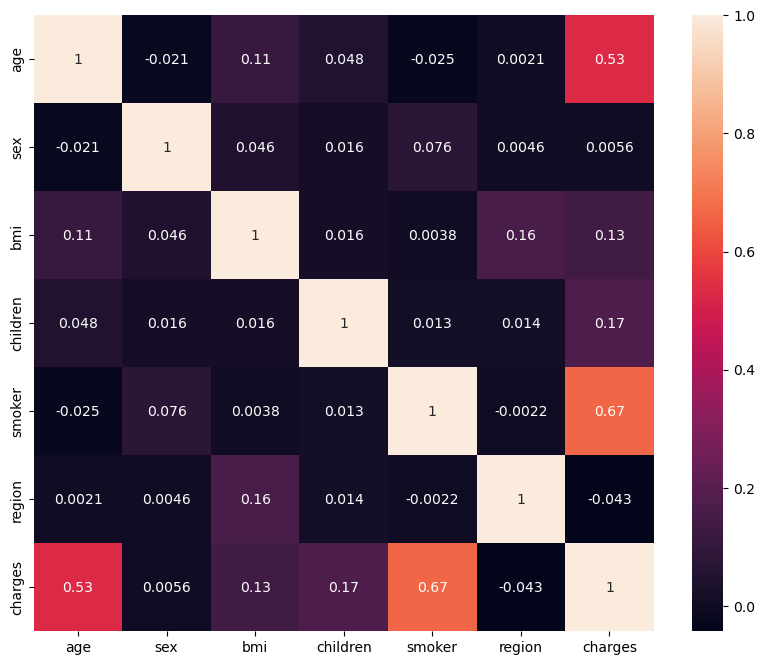

In [31]:

plt.figure(figsize=(10,8))  # Width: 10.6 inches, Height: 8.4 inches
sns.heatmap(df.corr(), annot = True)
plt.show()

In [32]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.048406,-0.025019,0.002127,0.527834
sex,-0.020856,1.000000,0.046371,0.016296,0.076185,0.004588,0.005632
bmi,0.109272,0.046371,1.000000,0.016178,0.003750,0.157566,0.132669
children,0.048406,0.016296,0.016178,1.000000,0.013245,0.013722,0.171784
smoker,-0.025019,0.076185,0.003750,0.013245,1.000000,-0.002181,0.665506
region,0.002127,0.004588,0.157566,0.013722,-0.002181,1.000000,-0.042690
charges,0.527834,0.005632,0.132669,0.171784,0.665506,-0.042690,1.000000


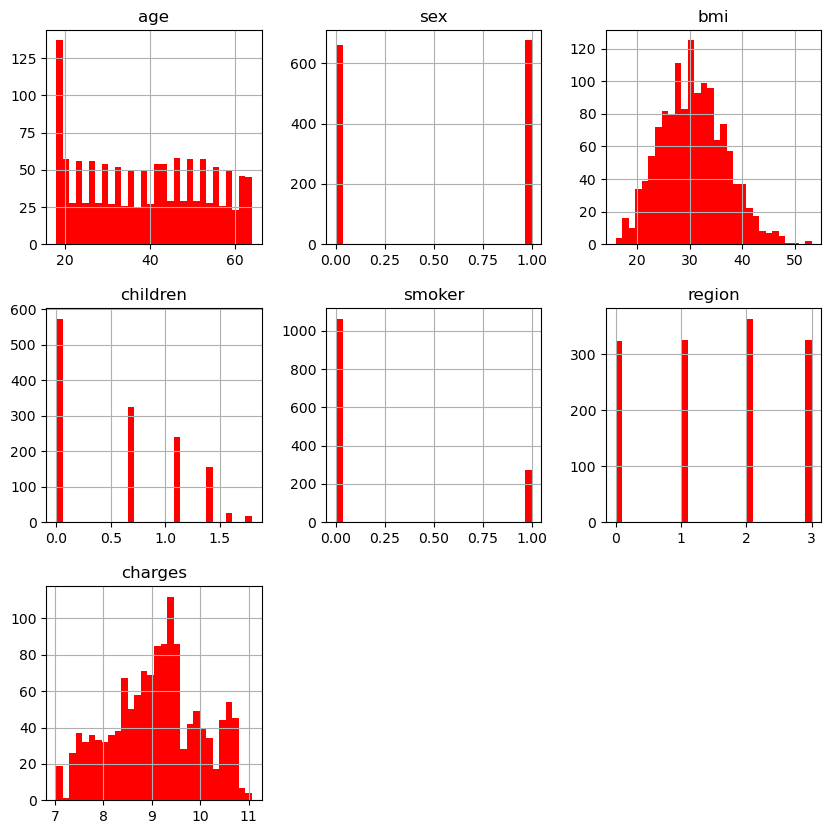

In [34]:
df[['age','sex','bmi','children','smoker','region','charges']].hist(bins=30, figsize=(10,10), color='red')
plt.show()

In [19]:
label_encoder = preprocessing.LabelEncoder()

df['sex'] = label_encoder.fit_transform(df['sex'])
df['region'] = label_encoder.fit_transform(df['region'])
df['smoker' ]= label_encoder.fit_transform(df['smoker'])

In [20]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [21]:
df.skew()

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

<Axes: ylabel='Density'>

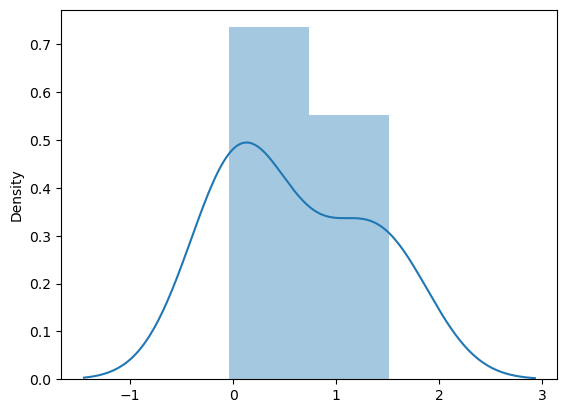

In [22]:
sk = df.skew()
sns.distplot(sk)

In [25]:
# DEAL WITH OUTLIERS
#Log Transformation
df['charges']= np.log(df['charges'])

In [26]:
# constant = 1  # Choose an appropriate constant
# df['children'] = df['children'] + constant

# # Apply log transformation
# df['children'] = np.log(df['children'])

In [62]:
df.kurtosis()

age        -1.245088
sex        -2.002557
bmi        -0.050732
children   -1.343101
smoker      0.145756
region     -1.327702
charges    -0.636667
dtype: float64

<Axes: ylabel='Density'>

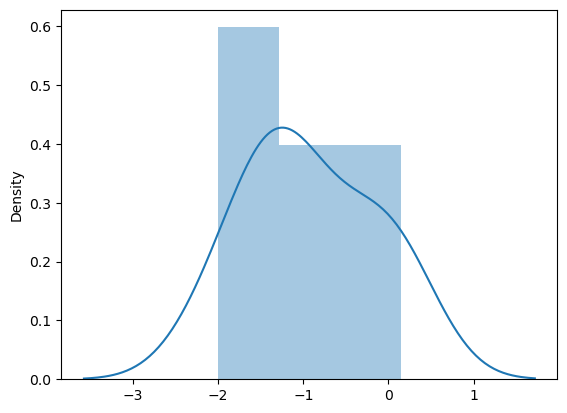

In [63]:
kt = df.kurtosis()
sns.distplot(kt)

In [64]:
x = df.drop(['charges','sex',], axis=1)
y = df.charges

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (936, 5)
x_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [66]:
linreg = LinearRegression()

In [67]:
linreg.fit(x_train, y_train)
pred = linreg.predict(x_test)

In [68]:
print("R2 score: ",(r2_score(y_test,pred)))

R2 score:  0.7833873383935525


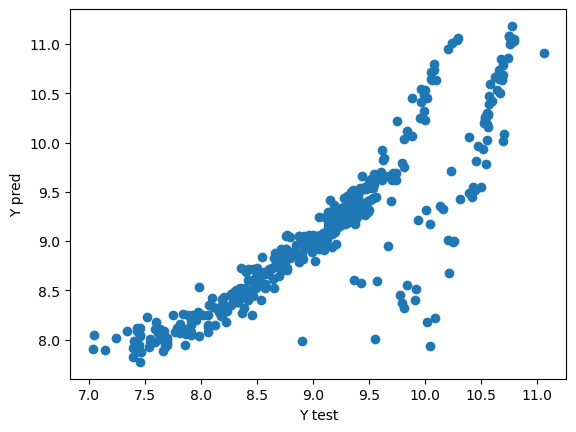

In [69]:
plt.scatter(y_test,pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [75]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index =[0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,1,2


In [76]:
cost_pred = linreg.predict(cust_df)
print("The charges cost of the new customer is: ", cost_pred)

The charges cost of the new customer is:  [10.90774188]
